# Analiza klientów w podejściu hierarchicznym

ZADANIE: Proszę wziąć zbiór klientów win i dokonać podobnej analizy jak w kmeans

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [61]:
import pandas as pd

df_offers = pd.read_excel("datasets/WineKMC.xlsx", sheetname=0)
df_offers.columns = ["offer_id", "campaign", "varietal", "min_qty", "discount", "origin", "past_peak"]
df_offers.head()

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


In [62]:
df_transactions = pd.read_excel("datasets/WineKMC.xlsx", sheetname=1)
df_transactions.columns = ["customer_name", "offer_id"]
df_transactions['n'] = 1
df_transactions.head()

,customer_name,offer_id,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


In [63]:
# join the offers and transactions table
df = pd.merge(df_offers, df_transactions)
# create a "pivot table" which will give us the number of times each customer responded to a given offer
matrix = df.pivot_table(index=['customer_name'], columns=['offer_id'], values='n')
# a little tidying up. fill NA values with 0 and make the index into a column
matrix = matrix.fillna(0).reset_index()
# # save a list of the 0/1 columns. we'll use these a bit later
x_cols = matrix.columns[1:]
# print(df)
# print("------------")
print(matrix)

offer_id customer_name    1    2    3    4    5    6    7    8    9 ...    23  \
0                Adams  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   
1                Allen  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0 ...   0.0   
2             Anderson  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   
3               Bailey  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0 ...   0.0   
4                Baker  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0 ...   0.0   
5               Barnes  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   
6                 Bell  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   
7              Bennett  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0 ...   0.0   
8               Brooks  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0 ...   0.0   
9                Brown  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0 ...   0.0   
10              Butler  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   
11            Campbell  0.0 

In [64]:
df

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak,customer_name,n
0,1,January,Malbec,72,56,France,False,Thomas,1
1,1,January,Malbec,72,56,France,False,Jackson,1
2,1,January,Malbec,72,56,France,False,Mitchell,1
3,1,January,Malbec,72,56,France,False,Peterson,1
4,1,January,Malbec,72,56,France,False,Wood,1
5,1,January,Malbec,72,56,France,False,Price,1
6,1,January,Malbec,72,56,France,False,Foster,1
7,1,January,Malbec,72,56,France,False,Sanders,1
8,1,January,Malbec,72,56,France,False,Butler,1
9,1,January,Malbec,72,56,France,False,Fisher,1


In [65]:

from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(matrix[matrix.columns[2:]], method = 'average', metric='euclidean')

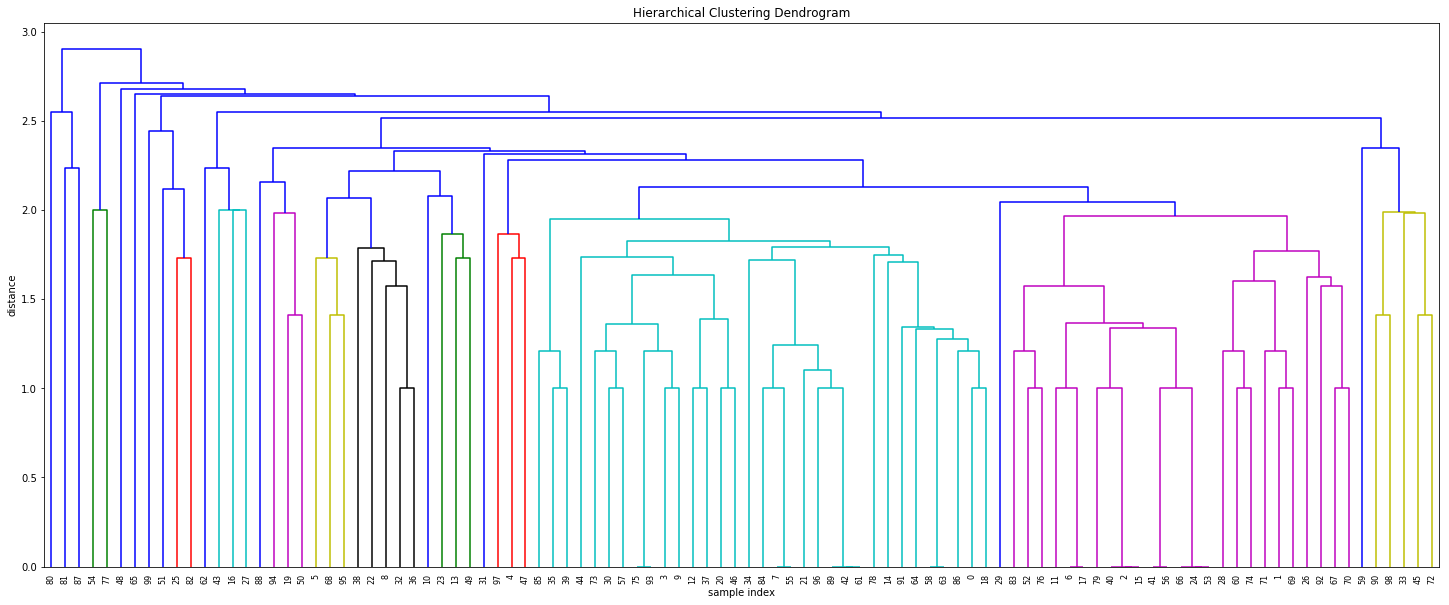

In [66]:

# calculate full dendrogram# calcul 
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

ZADANIE: Wypiszmy liczności klastrów na poziomach od 2 do 10 licząc od góry

In [67]:
#wypiszmy liczności klastrów z hierarchii

from scipy.cluster.hierarchy import fcluster

for k in range(2,10):
    matrix['cluster_' + str(k)] = fcluster(Z, k, criterion='maxclust')
    s = ""
    for i in range(1,k+1):
        s = s + str(len(np.where(matrix['cluster_' + str(k)] == i)[0])) + ", "
    print(str(k) + ": " + s)

2: 3, 97, 
3: 3, 2, 95, 
4: 3, 2, 94, 1, 
5: 3, 2, 93, 1, 1, 
6: 3, 2, 4, 89, 1, 1, 
7: 3, 2, 4, 4, 85, 1, 1, 
8: 2, 1, 2, 4, 4, 85, 1, 1, 
9: 2, 1, 2, 4, 4, 79, 6, 1, 1, 


ZADANIE: Prosze wybrać sobie klienta np. Allen. Zobaczmy co preferują (a co nie) ludzie podobni do Allen'a - jakie wina, w jakich ilościach i z jakimi rabatami. Patrzymy na górne poziomy hierarchii.

In [68]:
matrix

offer_id,customer_name,1,2,3,4,5,6,7,8,9,...,31,32,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9
0,Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2,3,3,3,4,5,6,6
1,Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,2,3,3,3,4,5,6,6
2,Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2,3,3,3,4,5,6,6
3,Bailey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,2,3,3,3,4,5,6,6
4,Baker,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,2,3,3,3,4,5,6,6
5,Barnes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2,3,3,3,4,5,6,6
6,Bell,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2,3,3,3,4,5,6,6
7,Bennett,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,2,3,3,3,4,5,6,6
8,Brooks,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,2,3,3,3,4,5,6,6
9,Brown,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,2,3,3,3,4,5,6,6


In [71]:
df

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak,customer_name,n
0,1,January,Malbec,72,56,France,False,Thomas,1
1,1,January,Malbec,72,56,France,False,Jackson,1
2,1,January,Malbec,72,56,France,False,Mitchell,1
3,1,January,Malbec,72,56,France,False,Peterson,1
4,1,January,Malbec,72,56,France,False,Wood,1
5,1,January,Malbec,72,56,France,False,Price,1
6,1,January,Malbec,72,56,France,False,Foster,1
7,1,January,Malbec,72,56,France,False,Sanders,1
8,1,January,Malbec,72,56,France,False,Butler,1
9,1,January,Malbec,72,56,France,False,Fisher,1


In [99]:
name = "Adams"
matrix.loc[matrix['customer_name'] == name, 'cluster_2']


0    2
Name: cluster_2, dtype: int32

In [100]:
name = "Adams"
matrix.loc[matrix['customer_name'] == name, 'cluster_2'].iloc[0]

2

In [101]:

#zobaczmy co lubi kupować klaster w którym jest klient Adams
name = 'Adams'
#analizujemy wszystkie podziały od 2 do 9 klastrów
for k in range(2,10):
    #wybieramy klaster w którym jest Allen
    cluster = matrix.loc[matrix['customer_name'] == name, 'cluster_' + str(k)].iloc[0]
    #dodajemy sobie kolumnę mówiąca czy to jest ten sam klaster co Adams - będę po niej grupował
    df['is_' + name + '_cluster'] = matrix['cluster_' + str(k)] == cluster
    print("clusters " + str(k))
    #grupuję pole 'variental' po klastrach Adams'a
    print(df.groupby("is_" + name + "_cluster").varietal.value_counts())
    print("--------------------------------")

clusters 2
is_Adams_cluster  varietal          
False             Espumante              3
True              Prosecco              31
                  Espumante             23
                  Champagne             12
                  Malbec                10
                  Pinot Noir            10
                  Chardonnay             7
                  Cabernet Sauvignon     4
Name: varietal, dtype: int64
--------------------------------
clusters 3
is_Adams_cluster  varietal          
False             Espumante              4
                  Prosecco               1
True              Prosecco              30
                  Espumante             22
                  Champagne             12
                  Malbec                10
                  Pinot Noir            10
                  Chardonnay             7
                  Cabernet Sauvignon     4
Name: varietal, dtype: int64
--------------------------------
clusters 4
is_Adams_cluster  varietal          
F

Jest to typowy klient - znajduje się największym klastrze.

In [102]:
for k in range(2,10):
    #wybieramy klaster w którym jest Adams - to jest tablica
    cluster = matrix.loc[matrix['customer_name'] == name]['cluster_' + str(k)].iloc[0]
    #dodajemy sobie kolumnę mówiąca czy to jest ten sam klaster co Adams - będę po niej grupował
    df['is_' + name + '_cluster'] = matrix['cluster_' + str(k)] == cluster
    print("clusters " + str(k))
    #grupuję pole 'variental' po klastrach Adams'a
    print(df.groupby("is_" + name + "_cluster")[['min_qty', 'discount']].mean())
    print("--------------------------------")

clusters 2
                    min_qty   discount
is_Adams_cluster                      
False              6.000000  45.000000
True              69.030928  47.731959
--------------------------------
clusters 3
                    min_qty   discount
is_Adams_cluster                      
False              6.000000  44.000000
True              70.357895  47.842105
--------------------------------
clusters 4
                    min_qty  discount
is_Adams_cluster                     
False             29.000000  51.00000
True              69.574468  47.43617
--------------------------------
clusters 5
                    min_qty   discount
is_Adams_cluster                      
False             25.714286  49.428571
True              70.258065  47.516129
--------------------------------
clusters 6
                    min_qty   discount
is_Adams_cluster                      
False             56.181818  51.454545
True              68.494382  47.179775
--------------------------------
clus

Jego grupa kupuje w małych dużych ilościach